In [32]:
!pip install ktrain

In [33]:
pip install bnltk

  Using cached bnltk-0.7.6-py3-none-any.whl (11 kB)
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_

In [34]:
!pip install bnlp-toolkit==4.0.0.dev4

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
     

In [36]:
df = pd.read_excel("/kaggle/input/bangla-ekman-six-emotion-dataset/Dataset.xlsx")

In [37]:
df = df.drop('Racial Biases', axis=1)       
#axis=1 for coloum;
df = df.drop('Hatred Percentage', axis=1)
df = df.drop('Depression Percentage', axis=1)
df = df.drop('Year', axis=1)

In [38]:
from bnlp import CleanText

clean_text = CleanText(
   fix_unicode=True,
   unicode_norm=True,
   unicode_norm_form="NFKC",
   remove_url=True,
   remove_email=False,
   remove_emoji=False,
   remove_number=False,
   remove_digits=False,
   remove_punct=False,
   replace_with_url="<URL>",
   replace_with_email="<EMAIL>",
   replace_with_number="<NUMBER>",
   replace_with_digit="<DIGIT>",
   replace_with_punct = "<PUNC>"
)


In [39]:
df['Text'] = df['Text'].apply(clean_text)

In [40]:
rows_to_display = [0, 1, 2]  # Choose the row indices you want to display

for row_index in rows_to_display:
    print(f"Row {row_index} - Cleaned Text: {df.loc[row_index, 'Text']}")
    #print(f"Row {row_index} - Cleaned Text : {df.loc[row_index, 'cleaned_text']}\n")

Row 0 - Cleaned Text: নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভোট বাক্স ভর্তি হলে যা হয়
Row 1 - Cleaned Text: জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রোহী পেট্রল বোমারুদের নির্বাচনী ফলাফল থেকে উচ্ছেদ করেছে, ইহাই জনগনের মূল আনন্দ, জয় বাংলা!
Row 2 - Cleaned Text: ভেজাল নির্বাচন ।


In [41]:
longest_string = max(df["Text"], key=len)
print(len(longest_string))

3540


In [42]:
print((longest_string))

71 টিভিতে গলাবাজি ও তথ্য বিকৃতির বিরুদ্ধে মাওলানা সাখাওয়াত হোস... 71 টিভিতে গলাবাজি ও তথ্য বিকৃতির বিরুদ্ধে মাওলানা সাখাওয়াত হোসেন একা ভালই জবাব দিয়েছে। প্রসঙ্গ রাষ্ট্রধর্ম ইসলাম নিয়ে একাত্তর জার্নালের গলাবাজি ও তথ্য বিকৃতি: গতকাল একাত্তর জার্নালে মুফতী সাখাওয়াত হুসাইনকে রাষ্ট্রধর্ম ইসলাম নিয়ে বিভিন্ন প্রশ্ন করা হয়। তাঁর উত্তর শোনার আগেই বারবার থামিয়ে ভিন্ন প্রসঙ্গ ও ভুল তথ্য ছুঁড়ে বিভ্রান্ত করার চেষ্টা করা হয়। অনুষ্ঠানে যে তিনটি মৌলিক প্রশ্ন করা হয় তা হলো: 1 পৃথিবীর কয়টা মুসলিম দেশে সংবিধানে ইসলাম আছে? কোন দেশে? 2 রাষ্ট্রধর্মে ইসলাম না থাকলে কি দেশে ইসলাম থাকবে না? 3 এরশাদ একটা মতলব নিয়ে এটা করেছিল, পরবর্তীতে বিএনপি ভয়ে তা বাদ দেয় নি। [ভিডিও লিংক: <URL>] প্রথম প্রশ্নের উত্তরে মুফতী সাহেব মধ্যপ্রাচ্যের মুসলিম দেশসহ বিশ্বের অনেকগুলো মুসলিম দেশে সংবিধানে রাষ্ট্রধর্ম ইসলাম থাকার কথা বললে উপস্থাপিকা জোর দিয়ে বলার চেষ্টা করেন যে, ইন্দোনেশিয়া, মালয়েশিয়াতে তো নেই। আরো বলেন, ইরাক, ইরানেও নেই। মুফতী সাহেব মরক্কো, আলজেরিয়ার কথা বললে, সেগুলোও উপস্থাপিকা অস্বীকার করেন। অথচ আমরা

In [43]:
import re


def remove_special_characters(text):
    # Define a pattern to match special characters
    pattern = r'[#@*\[\]{}]'
    # Use re.sub() to remove the special characters
    clean_text = re.sub(pattern, '', text)
    return clean_text

# Apply the function to the 'Text' column
df['Text'] = df['Text'].apply(remove_special_characters)



In [44]:
df

,SL,Emotion,Text
0,1,disgust,নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভ...
1,2,disgust,জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রো...
2,3,angry,ভেজাল নির্বাচন ।
3,4,happy,বিএনপি ও রাজাকার সমর্থকরা হেরে গেলে দেশের জন্য...
4,5,angry,"সূক্ষ্ম কারচুপি বলে এতদিন একটা কথার কথা ছিল, এ..."
...,...,...,...
35995,35996,surprise,ভারতের মতো একটা বিশাল দেশে এত অঙ্গরাজ্য যে সব ...
35996,35997,surprise,"২৪, ৫০, এমনকি কারো কারো মতে ৬০ জন।"
35997,35998,surprise,এদের মধ্য থেকে ২৭ জনকে রাজা বিয়ে দিয়েছিল চন্...
35998,35999,surprise,"ওয়াকফের শাব্দিক অর্থ কোনো কিছু আটকে রাখা, উৎস..."


## LIST FOR STOP WORDS

In [45]:
from bnlp import BengaliCorpus as corpus
stop_words=set(corpus.stopwords)

In [46]:
size_of_set = len(stop_words)
size_of_set

398

In [47]:
stop_words= {'অতএব',
 'অথচ',
  'অবধি',
 'অর্থাত',
 'আই',
 'আর',
 'আরও',
 'ই',
 'ইহা',
  'এ',
 'এই',
 'একই',
 'একে',
 'এটা',
 'এটাই',
  'এত',
  'এতে',
  'এব',
 'এর',
 'এস',
 'ঐ',
 'ও',
 'ওঁর',
 'ওঁরা',
 'ওই',
 'ওকে',
  'ওর',
 'ওরা',
 'কমনে',
  'করা',
 'করাই',
 'করায়',
 'করিয়ে',
 'করেই',
 'কাছ',
 'কারও',
 'কি',
 'কিংবা',
  'কী',
 'কে',
 'কেউ',
 'কেউই',
 'কেখা',
 'ছাড়াও',
 'জন্যওজে',
 'জানিয়েছে',
 'জে',
 'জ্নজন',
 'টি',
 'তত',
 'তা',
 'তাঁাহারা',
 'তাই',
 'তাও',
 'তাতে',
 'তারৈ',
 'তাহা',
 'তাহাতে',
 'তিনঐ',
 'তুলে',
 'তো',
 'দু',
 'ধামার',
 'পরেই',
 'পাচ',
 'পি',
 'পেয়্র্',
 'প্রযন্ত',
 'ফের',
 'বরং',
 'বহু',
 'বা',
 'বি',
 'মোটেই',
 'যা',
 'যে',
 'র',
 'সহ',
 'সহিত',
 'সি',
 'সে',
 'সেই',
 'সেটাই',
 'স্বয়ং',
 'হত',
 'হতেই',
 'হন',
  'হয়েই',
 'হলেই',
 'হৈলে'}


In [48]:
size_of_set = len(stop_words)
size_of_set

90

In [49]:
from bnlp import NLTKTokenizer

bnltk = NLTKTokenizer()

def tokenize_text(cleaned_text):
    word_tokens = bnltk.word_tokenize(cleaned_text)
    sentence_tokens = bnltk.sentence_tokenize(cleaned_text)
    return word_tokens, sentence_tokens

# Apply tokenization to the 'Text' column
df[['word_token', 'sentence_tokens']] = df['Text'].apply(tokenize_text).apply(pd.Series)

# Print the tokenized data for a few specific rows
rows_to_display = [0, 1, 2,3,4]  # Choose the row indices you want to display

for row_index in rows_to_display:
    print(f"Row {row_index} - Original Text: {df.loc[row_index, 'Text']}")
    print(f"Row {row_index} - Word Tokens: {df.loc[row_index, 'word_token']}")
    print(f"Row {row_index} - Sentence Tokens: {df.loc[row_index, 'sentence_tokens']}\n")
     

Row 0 - Original Text: নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভোট বাক্স ভর্তি হলে যা হয়
Row 0 - Word Tokens: ['নির্বাচনের', 'আগের', 'রাতে', 'সুষ্টু', 'শান্তিপূর্ণ', 'ভাবে', 'ভোট', 'বাক্স', 'ভর্তি', 'হলে', 'যা', 'হয়']
Row 0 - Sentence Tokens: ['নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভোট বাক্স ভর্তি হলে যা হয়']

Row 1 - Original Text: জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রোহী পেট্রল বোমারুদের নির্বাচনী ফলাফল থেকে উচ্ছেদ করেছে, ইহাই জনগনের মূল আনন্দ, জয় বাংলা!
Row 1 - Word Tokens: ['জনগণ', 'মনের', 'আনন্দে', 'নিজেদের', 'ভোট', 'কাস্ট', 'করে', 'দেশদ্রোহী', 'পেট্রল', 'বোমারুদের', 'নির্বাচনী', 'ফলাফল', 'থেকে', 'উচ্ছেদ', 'করেছে', ',', 'ইহাই', 'জনগনের', 'মূল', 'আনন্দ', ',', 'জয়', 'বাংলা', '!']
Row 1 - Sentence Tokens: ['জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রোহী পেট্রল বোমারুদের নির্বাচনী ফলাফল থেকে উচ্ছেদ করেছে, ইহাই জনগনের মূল আনন্দ, জয় বাংলা!']

Row 2 - Original Text: ভেজাল নির্বাচন ।
Row 2 - Word Tokens: ['ভেজাল', 'নির্বাচন', '।']
Row 2 - Sentence Tokens: ['ভেজ

In [50]:
import nltk
from collections import Counter
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') # For part-of-speech tagging (optional)


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [51]:
tokenized_words_bengali = []
for sentence in df['Text']:
    tokenized_words_bengali.extend(nltk.word_tokenize(sentence))

# Count word frequencies
word_freq_bengali = Counter(tokenized_words_bengali)

# Print the most frequent words
most_common_words_bengali = word_freq_bengali.most_common(20)  
print("Most frequent words in Bengali:")
for word, frequency in most_common_words_bengali:
    print(f"{word}: {frequency} times")

Most frequent words in Bengali:
,: 18325 times
?: 10016 times
!: 8680 times
না: 6553 times
করে: 5431 times
কি: 4671 times
এই: 4569 times
আর: 4266 times
।: 3717 times
ও: 3190 times
করা: 2760 times
...: 2736 times
যে: 2647 times
থেকে: 2462 times
কোন: 2450 times
জন্য: 2448 times
হবে: 2253 times
করতে: 2200 times
কথা: 2119 times
হয়: 2046 times


In [52]:
df

,SL,Emotion,Text,word_token,sentence_tokens
0,1,disgust,নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভ...,"[নির্বাচনের, আগের, রাতে, সুষ্টু, শান্তিপূর্ণ, ...",[নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ...
1,2,disgust,জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রো...,"[জনগণ, মনের, আনন্দে, নিজেদের, ভোট, কাস্ট, করে,...",[জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্র...
2,3,angry,ভেজাল নির্বাচন ।,"[ভেজাল, নির্বাচন, ।]",[ভেজাল নির্বাচন ।]
3,4,happy,বিএনপি ও রাজাকার সমর্থকরা হেরে গেলে দেশের জন্য...,"[বিএনপি, ও, রাজাকার, সমর্থকরা, হেরে, গেলে, দেশ...",[বিএনপি ও রাজাকার সমর্থকরা হেরে গেলে দেশের জন্...
4,5,angry,"সূক্ষ্ম কারচুপি বলে এতদিন একটা কথার কথা ছিল, এ...","[সূক্ষ্ম, কারচুপি, বলে, এতদিন, একটা, কথার, কথা...","[সূক্ষ্ম কারচুপি বলে এতদিন একটা কথার কথা ছিল, ..."
...,...,...,...,...,...
35995,35996,surprise,ভারতের মতো একটা বিশাল দেশে এত অঙ্গরাজ্য যে সব ...,"[ভারতের, মতো, একটা, বিশাল, দেশে, এত, অঙ্গরাজ্য...",[ভারতের মতো একটা বিশাল দেশে এত অঙ্গরাজ্য যে সব...
35996,35997,surprise,"২৪, ৫০, এমনকি কারো কারো মতে ৬০ জন।","[২৪, ,, ৫০, ,, এমনকি, কারো, কারো, মতে, ৬০, জন, ।]","[২৪, ৫০, এমনকি কারো কারো মতে ৬০ জন।]"
35997,35998,surprise,এদের মধ্য থেকে ২৭ জনকে রাজা বিয়ে দিয়েছিল চন্...,"[এদের, মধ্য, থেকে, ২৭, জনকে, রাজা, বিয়ে, দিয়...",[এদের মধ্য থেকে ২৭ জনকে রাজা বিয়ে দিয়েছিল চন...
35998,35999,surprise,"ওয়াকফের শাব্দিক অর্থ কোনো কিছু আটকে রাখা, উৎস...","[ওয়াকফের, শাব্দিক, অর্থ, কোনো, কিছু, আটকে, রা...","[ওয়াকফের শাব্দিক অর্থ কোনো কিছু আটকে রাখা, উৎ..."


In [53]:
df['Emotion'].value_counts()

Emotion
disgust     6000
angry       6000
happy       6000
surprise    6000
fear        6000
sad         6000
Name: count, dtype: int64

In [54]:
longest_string = max(df["Text"], key=len)
print(len(longest_string))

3520


In [55]:
def remove_stop_words(text):
    text = [w for w in text if not w in stop_words]
    text = ' '.join(text)
    return text

In [56]:
df['Text'] = [remove_stop_words(word_token) for word_token in df['word_token'].tolist()]

In [57]:
df

,SL,Emotion,Text,word_token,sentence_tokens
0,1,disgust,নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভ...,"[নির্বাচনের, আগের, রাতে, সুষ্টু, শান্তিপূর্ণ, ...",[নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ...
1,2,disgust,জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রো...,"[জনগণ, মনের, আনন্দে, নিজেদের, ভোট, কাস্ট, করে,...",[জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্র...
2,3,angry,ভেজাল নির্বাচন ।,"[ভেজাল, নির্বাচন, ।]",[ভেজাল নির্বাচন ।]
3,4,happy,বিএনপি রাজাকার সমর্থকরা হেরে গেলে দেশের জন্য ভ...,"[বিএনপি, ও, রাজাকার, সমর্থকরা, হেরে, গেলে, দেশ...",[বিএনপি ও রাজাকার সমর্থকরা হেরে গেলে দেশের জন্...
4,5,angry,"সূক্ষ্ম কারচুপি বলে এতদিন একটা কথার কথা ছিল , ...","[সূক্ষ্ম, কারচুপি, বলে, এতদিন, একটা, কথার, কথা...","[সূক্ষ্ম কারচুপি বলে এতদিন একটা কথার কথা ছিল, ..."
...,...,...,...,...,...
35995,35996,surprise,ভারতের মতো একটা বিশাল দেশে অঙ্গরাজ্য সব সময়ই ...,"[ভারতের, মতো, একটা, বিশাল, দেশে, এত, অঙ্গরাজ্য...",[ভারতের মতো একটা বিশাল দেশে এত অঙ্গরাজ্য যে সব...
35996,35997,surprise,"২৪ , ৫০ , এমনকি কারো কারো মতে ৬০ জন ।","[২৪, ,, ৫০, ,, এমনকি, কারো, কারো, মতে, ৬০, জন, ।]","[২৪, ৫০, এমনকি কারো কারো মতে ৬০ জন।]"
35997,35998,surprise,এদের মধ্য থেকে ২৭ জনকে রাজা বিয়ে দিয়েছিল চন্...,"[এদের, মধ্য, থেকে, ২৭, জনকে, রাজা, বিয়ে, দিয়...",[এদের মধ্য থেকে ২৭ জনকে রাজা বিয়ে দিয়েছিল চন...
35998,35999,surprise,"ওয়াকফের শাব্দিক অর্থ কোনো কিছু আটকে রাখা , উৎ...","[ওয়াকফের, শাব্দিক, অর্থ, কোনো, কিছু, আটকে, রা...","[ওয়াকফের শাব্দিক অর্থ কোনো কিছু আটকে রাখা, উৎ..."


In [58]:
longest_string = max(df["Text"], key=len)
print(len(longest_string))
print((longest_string))

3547
71 টিভিতে গলাবাজি তথ্য বিকৃতির বিরুদ্ধে মাওলানা সাখাওয়াত হোস... 71 টিভিতে গলাবাজি তথ্য বিকৃতির বিরুদ্ধে মাওলানা সাখাওয়াত হোসেন একা ভালই জবাব দিয়েছে । প্রসঙ্গ রাষ্ট্রধর্ম ইসলাম নিয়ে একাত্তর জার্নালের গলাবাজি তথ্য বিকৃতি : গতকাল একাত্তর জার্নালে মুফতী সাখাওয়াত হুসাইনকে রাষ্ট্রধর্ম ইসলাম নিয়ে বিভিন্ন প্রশ্ন হয় । তাঁর উত্তর শোনার আগেই বারবার থামিয়ে ভিন্ন প্রসঙ্গ ভুল তথ্য ছুঁড়ে বিভ্রান্ত করার চেষ্টা হয় । অনুষ্ঠানে তিনটি মৌলিক প্রশ্ন হয় হলো : 1 পৃথিবীর কয়টা মুসলিম দেশে সংবিধানে ইসলাম আছে ? কোন দেশে ? 2 রাষ্ট্রধর্মে ইসলাম না থাকলে দেশে ইসলাম থাকবে না ? 3 এরশাদ একটা মতলব নিয়ে করেছিল , পরবর্তীতে বিএনপি ভয়ে বাদ দেয় নি । ভিডিও লিংক : < URL > প্রথম প্রশ্নের উত্তরে মুফতী সাহেব মধ্যপ্রাচ্যের মুসলিম দেশসহ বিশ্বের অনেকগুলো মুসলিম দেশে সংবিধানে রাষ্ট্রধর্ম ইসলাম থাকার কথা বললে উপস্থাপিকা জোর দিয়ে বলার চেষ্টা করেন , ইন্দোনেশিয়া , মালয়েশিয়াতে নেই । আরো বলেন , ইরাক , ইরানেও নেই । মুফতী সাহেব মরক্কো , আলজেরিয়ার কথা বললে , সেগুলোও উপস্থাপিকা অস্বীকার করেন । আমরা দেখি : 1 মালয়েশিয়া

In [59]:
text = df['Text'].values.tolist()
label = df['Emotion'].tolist()

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text , label, test_size=0.2, random_state=42)

In [61]:
import ktrain
from ktrain import text
MODEL_NAME = 'sagorsarker/bangla-bert-base'
t = text.Transformer(MODEL_NAME, maxlen=500)

In [62]:
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)

preprocessing train...
language: bn
train sequence lengths:
	mean : 17
	95percentile : 46
	99percentile : 71


Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 16
	95percentile : 45
	99percentile : 70


In [63]:
model = t.get_classifier()

In [64]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=8)

In [65]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='auto')

In [66]:
history = learner.fit_onecycle (2e-5, 10, callbacks=[early_stopping])



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/10
3600/3600 [==============================] - 2232s 612ms/step - loss: 1.4733 - accuracy: 0.4191 - val_loss: 1.0472 - val_accuracy: 0.6311
Epoch 2/10
3600/3600 [==============================] - 2200s 611ms/step - loss: 0.8172 - accuracy: 0.7216 - val_loss: 0.6521 - val_accuracy: 0.7893
Epoch 3/10
3600/3600 [==============================] - 2200s 611ms/step - loss: 0.4953 - accuracy: 0.8382 - val_loss: 0.5654 - val_accuracy: 0.8190
Epoch 4/10
3600/3600 [==============================] - 2199s 611ms/step - loss: 0.3499 - accuracy: 0.8844 - val_loss: 0.5566 - val_accuracy: 0.8489
Epoch 5/10
3600/3600 [==============================] - 2199s 611ms/step - loss: 0.2838 - accuracy: 0.9049 - val_loss: 0.5645 - val_accuracy: 0.8442
Epoch 6/10
3600/3600 [==============================] - 2198s 611ms/step - loss: 0.2148 - accuracy: 0.9248 - val_loss: 0.5539 - val_accuracy: 0.8560
Epoch 7/10
3600/3600 [=====================

In [67]:
# Save the trained model
learner.save_model('/kaggle/output/Ekman-BanglaBert.zip')

In [68]:
learner.validate(class_names=t.get_classes()) 

225/225 [==============================] - 156s 678ms/step
              precision    recall  f1-score   support

       angry       0.87      0.85      0.86      1226
     disgust       0.87      0.91      0.89      1188
        fear       0.90      0.92      0.91      1129
       happy       0.93      0.87      0.90      1246
         sad       0.80      0.76      0.78      1244
    surprise       0.87      0.93      0.90      1167

    accuracy                           0.87      7200
   macro avg       0.87      0.87      0.87      7200
weighted avg       0.87      0.87      0.87      7200



array([[1041,   48,   25,   17,   70,   25],
       [  36, 1077,    1,   13,   32,   29],
       [  17,   10, 1038,    8,   44,   12],
       [  24,   12,   17, 1085,   69,   39],
       [  69,   75,   56,   43,  946,   55],
       [  14,   23,   16,    6,   28, 1080]])

In [69]:
def PlotGraph(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'g', label='Training acc')
    plt.plot(x, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'g', label='Training loss')
    plt.plot(x, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend() 

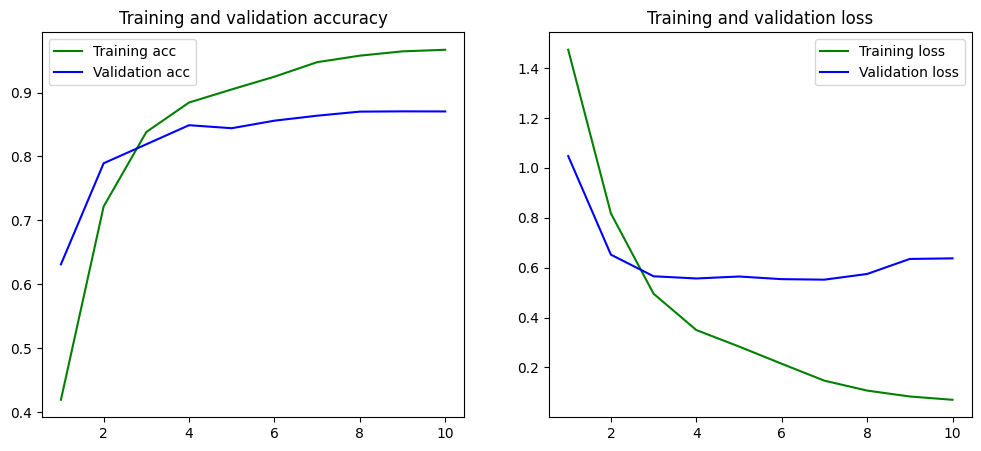

In [70]:
PlotGraph(history)